**Importing the necessary libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, recall_score, mean_squared_error
from imblearn.under_sampling import RandomUnderSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import seaborn as sns

**Import and see general statistics for csv file**

In [2]:
data = pd.read_csv("Churn/Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Checks that all values are present**

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Use Encoder to transform strings to numbers**

In [5]:
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data["Gender"] = label_encoder.fit_transform(data["Gender"])

**Assigns columns to X(features) and y(target)**

In [6]:
# X_general = data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)

features = ["Geography", "Gender", "Age", "Balance", "NumOfProducts", "IsActiveMember"]
X_specific = data[features]
y = data["Exited"] 

X = X_specific

**Undersample the data so there are equal numbers of 0 and 1 for the target**

In [21]:
under_sampler = RandomUnderSampler(random_state=9)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.Series(y_resampled, name="Exited")

data = pd.concat([X_resampled_df, y_resampled_df], axis=1)


**Splits the dataset into training, validation and testing**

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9, stratify=y)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.5, stratify=y_train)

**Fits min max scaler so all data is between 0 and 1**

In [10]:
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_train_scaled

array([[0.5       , 1.        , 0.32432432, 0.75242095, 0.33333333,
        1.        ],
       [0.        , 1.        , 0.40540541, 0.32087339, 0.        ,
        0.        ],
       [0.        , 0.        , 0.09459459, 0.5028399 , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.56756757, 0.53147349, 0.        ,
        0.        ],
       [0.        , 1.        , 0.18918919, 0.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.22972973, 0.65384783, 0.        ,
        1.        ]])

Converts all the values into a value between 0 and 1 so that columns with significantly larger values do not dominate the decisions

**Fits different machine learning models to the data**

In [11]:
y_predictions = []

In [12]:
data.Exited.value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [13]:
log_reg = LogisticRegression(random_state=9, max_iter=10000)
log_reg.fit(X_train, y_train)
y_predictions.append(log_reg.predict(X_val))


In [14]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_predictions.append(knn.predict(X_val))


In [15]:
dtc = DecisionTreeClassifier(random_state=9)
dtc.fit(X_train, y_train)
y_predictions.append(dtc.predict(X_val))


**Tests the accuracies and f1 scores of all the models and plots graphs**

In [16]:
model_names = ["Logistic Regression", "K nearest neighbour", "Decision Tree Classifier"]
model_num = 0
model_accuracies = []
model_cnfs = []
model_f1s = []
model_recalls = []
model_mse = []

for y_pred in y_predictions:
    
    model_accuracies.append(accuracy_score(y_val, y_pred))
    model_cnfs.append(confusion_matrix(y_val, y_pred))
    model_f1s.append(f1_score(y_val, y_pred))
    model_recalls.append(recall_score(y_val, y_pred))
    model_mse.append(mean_squared_error(y_val, y_pred))
    
    print(f"{model_names[model_num]}:\n model accuracy: {model_accuracies[model_num]}")
    print(f"Confusion matrix: {model_cnfs[model_num]}")
    print(f"F1 Score: {model_f1s[model_num]}")
    print(f"Recall score: {model_recalls[model_num]}")
    print(f"Mean squared error: {model_mse[model_num]}\n")
    model_num += 1

Logistic Regression:
 model accuracy: 0.8025
Confusion matrix: [[3093   92]
 [ 698  117]]
F1 Score: 0.228515625
Recall score: 0.14355828220858896
Mean squared error: 0.1975

K nearest neighbour:
 model accuracy: 0.7685
Confusion matrix: [[2956  229]
 [ 697  118]]
F1 Score: 0.20309810671256454
Recall score: 0.14478527607361963
Mean squared error: 0.2315

Decision Tree Classifier:
 model accuracy: 0.80325
Confusion matrix: [[2817  368]
 [ 419  396]]
F1 Score: 0.5015832805573147
Recall score: 0.48588957055214727
Mean squared error: 0.19675



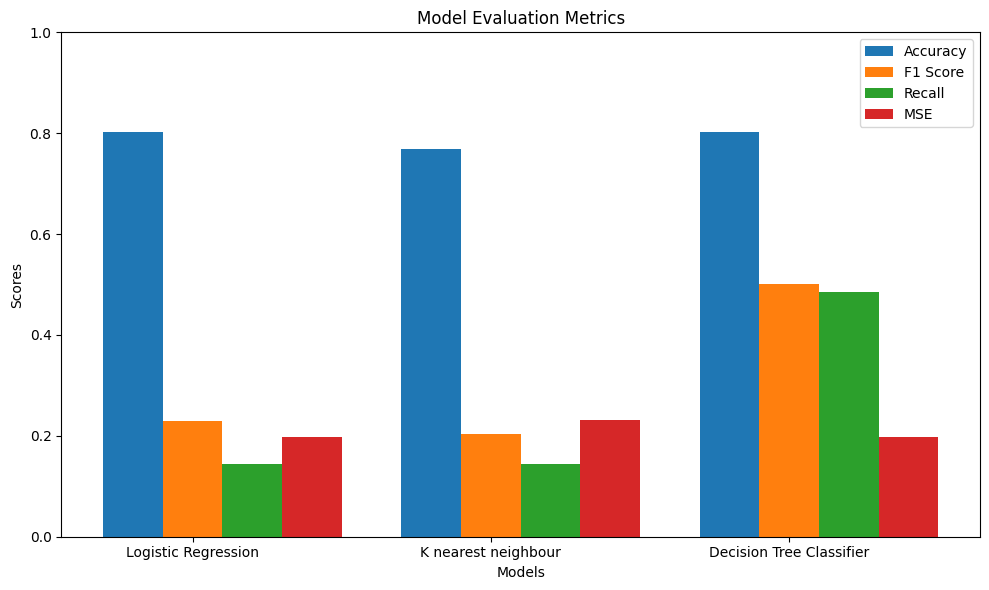

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
index = np.arange(len(model_names))

accuracy_bar = ax.bar(index, model_accuracies, bar_width, label='Accuracy')
f1_bar = ax.bar(index + bar_width, model_f1s, bar_width, label='F1 Score')
recall_bar = ax.bar(index + bar_width*2, model_recalls, bar_width, label="Recall")
mse_bar = ax.bar(index + bar_width*3, model_mse, bar_width, label="MSE")


ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Metrics')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(model_names)
ax.set_ylim([0, 1])  
ax.legend()

plt.tight_layout()
plt.show()


**Tests the model with decision tree classifier**

In [18]:
dtc = DecisionTreeClassifier(random_state=9)
dtc.fit(X_train, y_train)
y_test_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)
cnfm = confusion_matrix(y_test, y_test_pred)
f1_s = f1_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)

tests = [accuracy, f1_s, recall, mse]
test_names = ["Accuracy", "F1 Score", "Recall", "Mean squared error"]
    
print(f"Decision tree classifier:\n model accuracy: {accuracy}")
print(f"Confusion matrix: {cnfm}")
print(f"F1 Score: {f1_s}")
print(f"Recall score: {recall}")
print(f"Mean squared error: {mse}\n")
    

Decision tree classifier:
 model accuracy: 0.808
Confusion matrix: [[1411  182]
 [ 202  205]]
F1 Score: 0.5163727959697733
Recall score: 0.5036855036855037
Mean squared error: 0.192



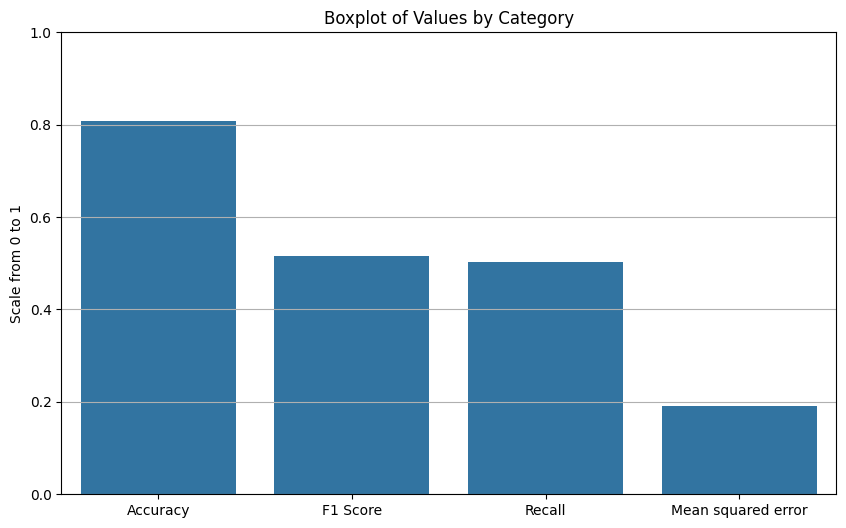

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=test_names, y=tests)
plt.ylim(0, 1)
plt.ylabel("Scale from 0 to 1")
plt.title("Boxplot of Values by Category")
plt.grid(True, axis="y")
plt.show()

**Tests the prediction of the model on test data**

In [25]:
test_record_specific = {
    "CreditScore": 600,
    "Geography": 2,
    "Gender": 0,
    "Age": 42,
    "Tenure": 2,
    "Balance": 150000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 100000
}

test_record_general = {
    "Geography": 1,
    "Gender": 0,
    "Age": 55,
    "Balance": 150000,
    "NumOfProducts": 4,
    "IsActiveMember": 1
    
}

test_record = test_record_general
test_record_df = pd.DataFrame([test_record])
test_prediction = dtc.predict(test_record_df)

test_prediction

array([1], dtype=int64)